In [3]:
import tensorflow as tf
from tensorflow import keras
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load the CIFAR-100 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()

In [4]:
X_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [5]:
# Get the class labels for CIFAR-100
class_labels = [    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
                    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
                    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
                    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
                    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
                    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
                    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
                    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
                    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
                    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
                    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
                    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
                    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
                    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
                    'worm']


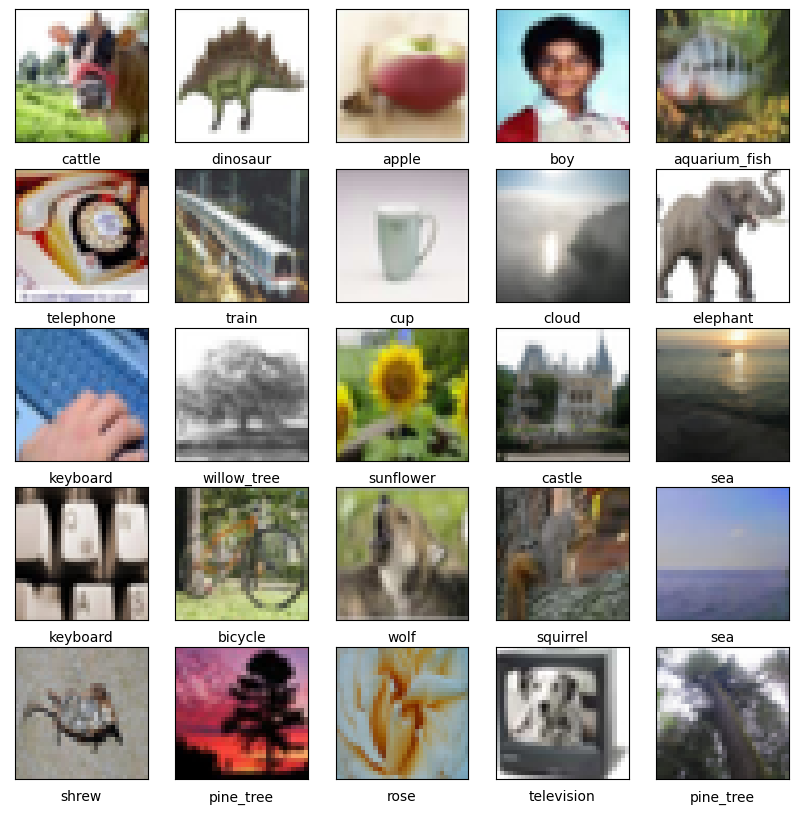

In [6]:
# Visualize the 100 classes
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[i][0]])
plt.show()

In [7]:
# Prepare the data for training
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), 
                        padding='same', 
                        activation='relu', 
                        input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3,3), 
                        padding='same', 
                        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(64, (3,3), 
                        padding='same', 
                        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3,3), 
                        padding='same', 
                        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.5),

    keras.layers.Conv2D(128, (3,3), 
                        padding='same', 
                        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3,3), 
                        padding='same', 
                        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(256, 
                       activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, 
                       activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    batch_size=64, 
                    epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
782/782 [==============================] - 175s 221ms/step - loss: 4.1700 - accuracy: 0.0941 - val_loss: 3.3452 - val_accuracy: 0.2055
Epoch 2/10
782/782 [==============================] - 166s 212ms/step - loss: 3.2994 - accuracy: 0.2010 - val_loss: 2.9977 - val_accuracy: 0.2582
Epoch 3/10
782/782 [==============================] - 158s 201ms/step - loss: 2.8914 - accuracy: 0.2731 - val_loss: 2.4980 - val_accuracy: 0.3506
Epoch 4/10
782/782 [==============================] - 156s 200ms/step - loss: 2.6459 - accuracy: 0.3177 - val_loss: 2.6507 - val_accuracy: 0.3337
Epoch 5/10
782/782 [==============================] - 156s 200ms/step - loss: 2.4847 - accuracy: 0.3532 - val_loss: 2.3186 - val_accuracy: 0.3905
Epoch 6/10
782/782 [==============================] - 156s 200ms/step - loss: 2.3690 - accuracy: 0.3785 - val_loss: 2.0777 - val_accuracy: 0.4377
Epoch 7/10
782/782 [==============================] - 156s 199ms/step - loss: 2.2705 - accuracy: 0.3982 - val_loss: 1.9990 -

In [9]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 1.8863170146942139
Test Accuracy: 0.48669999837875366


313/313 [==============================] - 9s 28ms/step


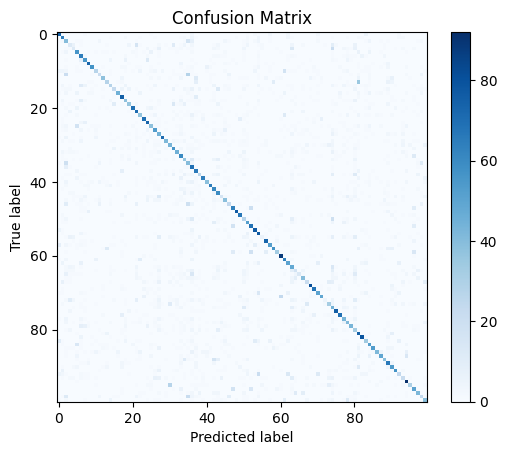

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()